In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
# Import data and describe
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Ch5-Data-Wrangling/CaseStudy/diamonds_casestudy.csv')
diamonds.head(n=10)



,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
#How many rows in the dataset, diamonds_casestudy.csv?
diamonds.shape


(53940, 10)

In [6]:
len(diamonds) # rows in the

53940

In [17]:
#How many diamonds whose price is greater than 2700

high_price = diamonds[diamonds.price > 2700]
high_price
print(high_price.shape)
len(high_price)

(25236, 10)


25236

In [13]:
(diamonds.price > 2700).sum() #if sum is applied to a list of True/Falses --> return # of Trues.

np.int64(25236)

In [26]:
(diamonds.price > 2700) & (diamonds.height > 5) #Find the diamonds whose price is greater than 2700 and height is greater than 5



,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [36]:
((diamonds.price > 2700) & (diamonds.height > 5)).sum() # --> there are 1454 diamonds which satisfy the above condition

np.int64(1454)

In [42]:
high_price_height = ((diamonds.price > 2700) & (diamonds.height > 5))
data_frame = diamonds[high_price_height]
print(data_frame)
data_frame.shape  # number of diamonds (rows) with price > 2700 and height > 5





       carat        cut color clarity  depth  table  price  width  length  \
11778   1.83       Fair     J      I1   70.0   58.0   5083   7.34    7.28   
13002   2.14       Fair     J      I1   69.4   57.0   5405   7.74    7.70   
13118   2.15       Fair     J      I1   65.5   57.0   5430   8.01    7.95   
13562   1.96       Fair     F      I1   66.6   60.0   5554   7.59    7.56   
13757   2.22       Fair     J      I1   66.7   56.0   5607   8.04    8.02   
...      ...        ...   ...     ...    ...    ...    ...    ...     ...   
27744   2.29    Premium     I     SI1   61.8   59.0  18797   8.52    8.45   
27745   2.00  Very Good     H     SI1   62.8   57.0  18803   7.95    8.00   
27746   2.07      Ideal     G     SI2   62.5   55.0  18804   8.20    8.13   
27748   2.00  Very Good     G     SI1   63.5   56.0  18818   7.90    7.97   
27749   2.29    Premium     I     VS2   60.8   60.0  18823   8.50    8.47   

       height  
11778    5.12  
13002    5.36  
13118    5.23  
13562    5.

(1454, 10)

In [ ]:
diamonds.describe()

,carat,depth,table,price,width,length,height
count,53940.000000,53890.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.748892,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432492,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
print(diamonds.shape)

(53940, 10)


In [ ]:
# Display a sample of the data
# Change random_state for a different sample
diamonds.sample(5, random_state=6)

,carat,cut,color,clarity,depth,table,price,width,length,height
9359,1.00,Good,F,SI1,63.6,62.0,4586,6.30,6.24,3.99
9490,1.10,Very Good,E,SI2,60.1,62.0,4607,6.65,6.69,4.01
27,0.30,Very Good,J,VS2,62.2,57.0,357,4.28,4.30,2.67
7743,1.24,Premium,E,SI2,60.8,57.0,4278,6.98,6.94,4.23
48686,0.77,Fair,J,VS1,61.2,66.0,2005,5.92,5.83,3.60


In [ ]:
# Calculate group means based on cut
diamonds.groupby(by=['cut']).mean(numeric_only=True)

,carat,depth,table,price,width,length,height
cut,,,,,,,
Fair,1.046137,64.036839,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365436,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709344,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264177,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.817683,57.956150,3981.759891,5.740696,5.770026,3.559801


In [ ]:
# Calculate group sizes for cut
diamonds.groupby(by=['cut']).size()

,0
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


In [ ]:
# Calculate group means by color
diamonds.groupby(by=['color']).mean(numeric_only=True)

,carat,depth,table,price,width,length,height
color,,,,,,,
D,0.657795,61.697207,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.661545,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694591,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.756430,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836192,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.845799,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887660,57.812393,5323.818020,6.519338,6.518105,4.033251


In [ ]:
# Calculate group sizes by color
diamonds.groupby(by=['color']).size()

,0
color,
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


In [ ]:
# Pivot table with average price for cut and color combinations
diamonds.pivot_table(values='price', index='color', columns='cut', aggfunc=np.mean)

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,4291.061350,3405.382175,2629.094566,3631.292576,3470.467284
E,3682.312500,3423.644159,2597.550090,3538.914420,3214.652083
F,3827.003205,3495.750275,3374.939362,4324.890176,3778.820240
G,4239.254777,4123.482204,3720.706388,4500.742134,3872.753806
H,5135.683168,4276.254986,3889.334831,5216.706780,4535.390351
I,4685.445714,5078.532567,4451.970377,5946.180672,5255.879568
J,4975.655462,4574.172638,4918.186384,6294.591584,5103.513274


In [ ]:
# Pivot table with group sizes for cut and color combinations
diamonds.pivot_table(values='price', index='cut', columns='color', aggfunc=np.size)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


## Structuring the diamonds data with python


In [ ]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [ ]:
# Standardize prices
#Note that this is performing Z-score standardization, not Min-Max scaling

price = diamonds['price']
std_price = preprocessing.scale(price)
diamonds['std_price'] = std_price

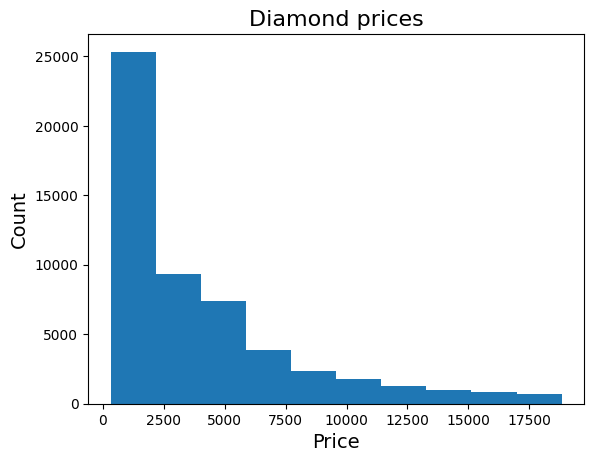

In [ ]:
# Histogram of prices
plt.hist(price)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond prices', fontsize=16)
plt.show()

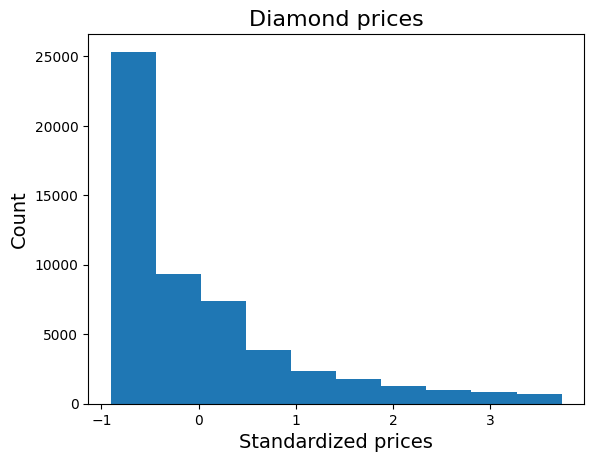

In [ ]:
# Histogram of standardized prices
plt.hist(std_price)
plt.xlabel('Standardized prices', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond prices', fontsize=16)
plt.show()

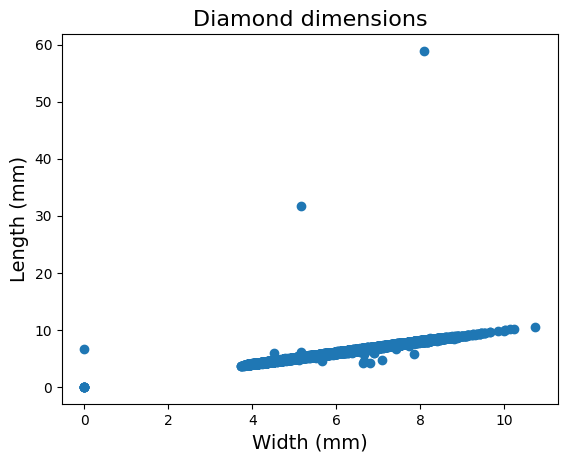

In [ ]:
# Scatterplot of width and length
plt.scatter(x=diamonds['width'], y=diamonds['length'])
plt.xlabel('Width (mm)', fontsize=14)
plt.ylabel('Length (mm)', fontsize=14)
plt.title('Diamond dimensions', fontsize=16)
plt.show()


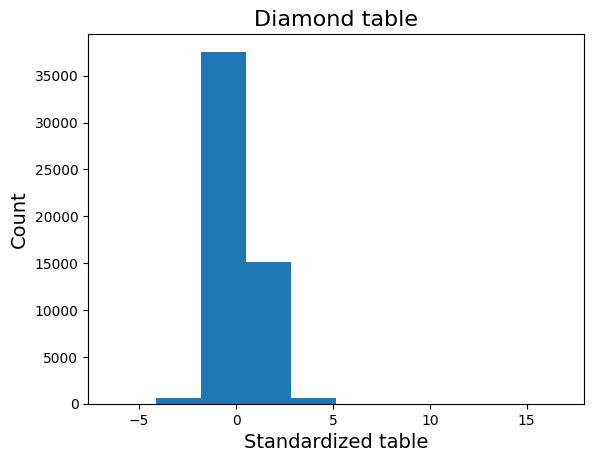

In [ ]:
# Standardize table and produce a plot
table = diamonds['table']
std_table = preprocessing.scale(table)
plt.hist(std_table)
plt.xlabel('Standardized table', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond table', fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

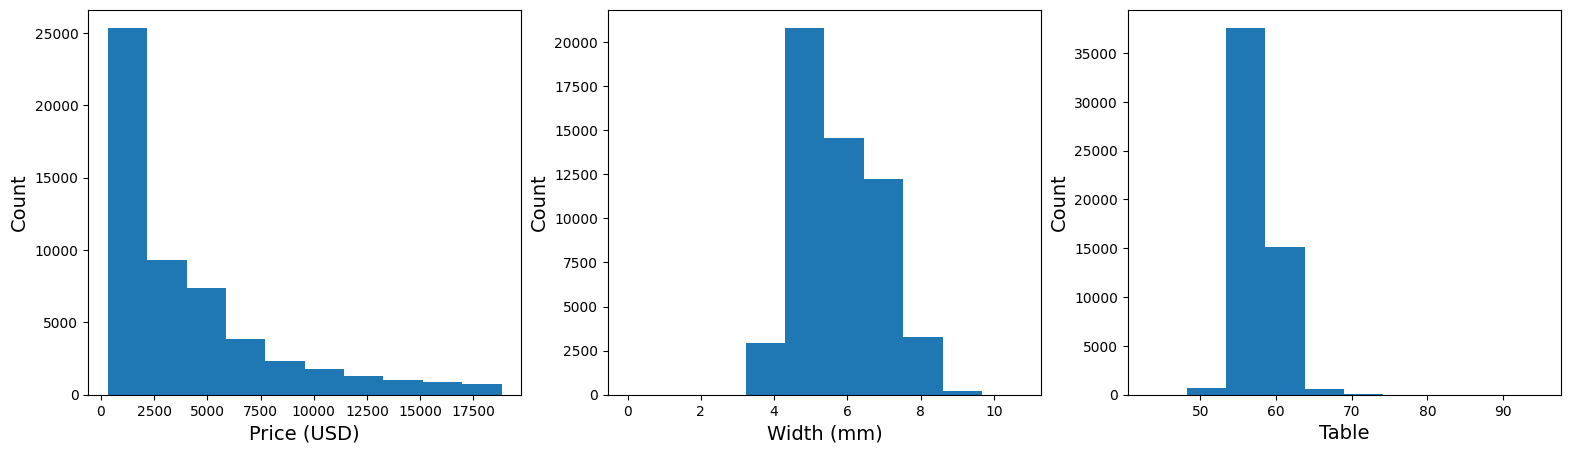

In [ ]:
# Plot price, width, and table
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (19, 5)

plt.subplot(1, 3, 1)
plt.hist(diamonds['price'])
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 3, 2)
plt.hist(diamonds['width'])
plt.xlabel('Width (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 3, 3)
plt.hist(diamonds['table'])
plt.xlabel('Table', fontsize=14)
plt.ylabel('Count', fontsize=14)

## Cleaning the diamonds data with Python


In [ ]:
# Display the number of entries for each feature
diamonds.count()

,0
carat,53940
cut,53940
color,53940
clarity,53940
depth,53890
table,53940
price,53940
width,53940
length,53940
height,53940


In [ ]:
# Display the number of instances that have
# NA for each feature
diamonds.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


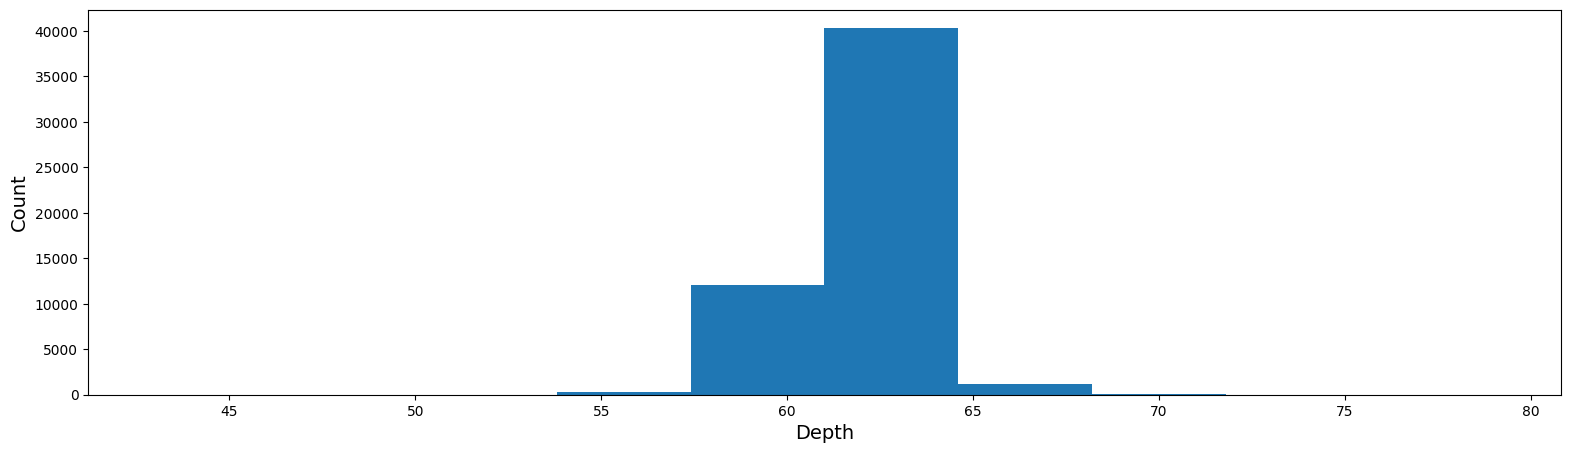

In [ ]:
# # Are there outliers in depth?
plt.hist(diamonds['depth'])
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
# Replace missing values for depth with the mean
mean = diamonds['depth'].mean()
diamonds['depth'].fillna(value=mean, inplace=True)
diamonds.isna().sum()

/tmp/ipython-input-1018877725.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diamonds['depth'].fillna(value=mean, inplace=True)


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
width,0
length,0
height,0


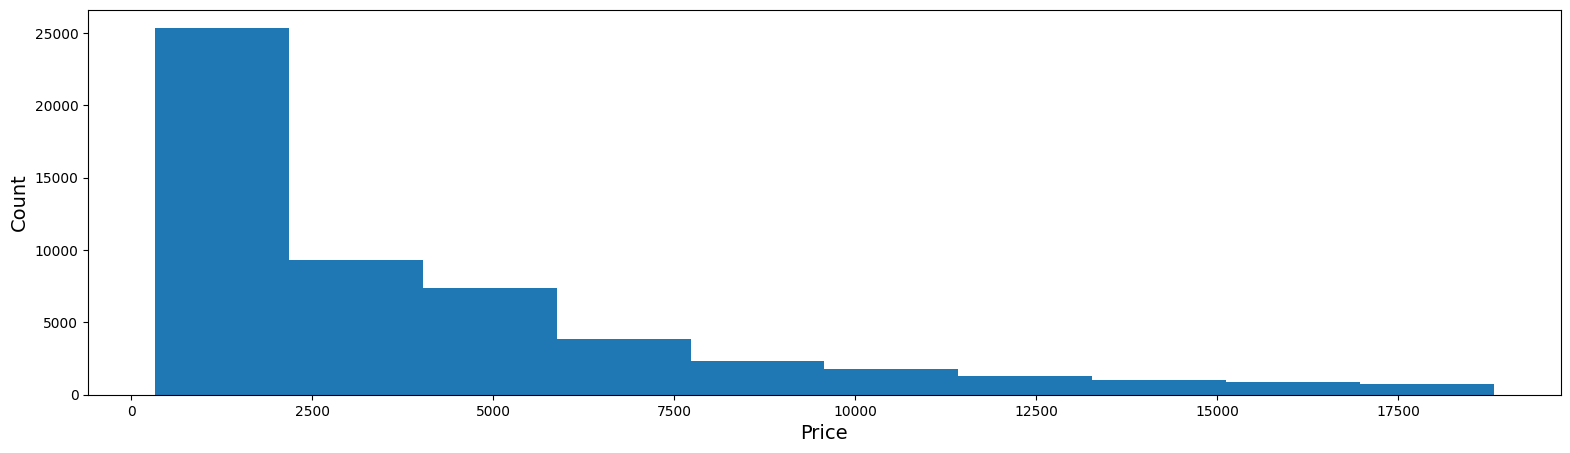

In [ ]:
# Are there outliers in price?
plt.hist(diamonds['price'])
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
#df2 = diamonds[diamonds['table'] > 8.5]
#df2.shape

(53940, 10)

In [ ]:
# Display the diamonds with high prices
diamonds[diamonds['price'] >= 18000]

,carat,cut,color,clarity,depth,table,price,width,length,height,std_price
27408,2.16,Ideal,G,SI2,62.5,54.2,18001,8.23,8.27,5.16,3.526393
27409,2.09,Premium,F,SI2,61.7,59.0,18002,8.23,8.21,5.07,3.526643
27410,2.18,Premium,G,SI2,61.9,60.0,18003,8.29,8.24,5.12,3.526894
27411,2.06,Very Good,G,SI2,62.3,59.0,18005,8.07,8.20,5.07,3.527395
27412,2.25,Premium,D,SI2,60.4,59.0,18007,8.54,8.48,5.13,3.527897
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,3.727425
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,3.727676
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,3.728177
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3.731185


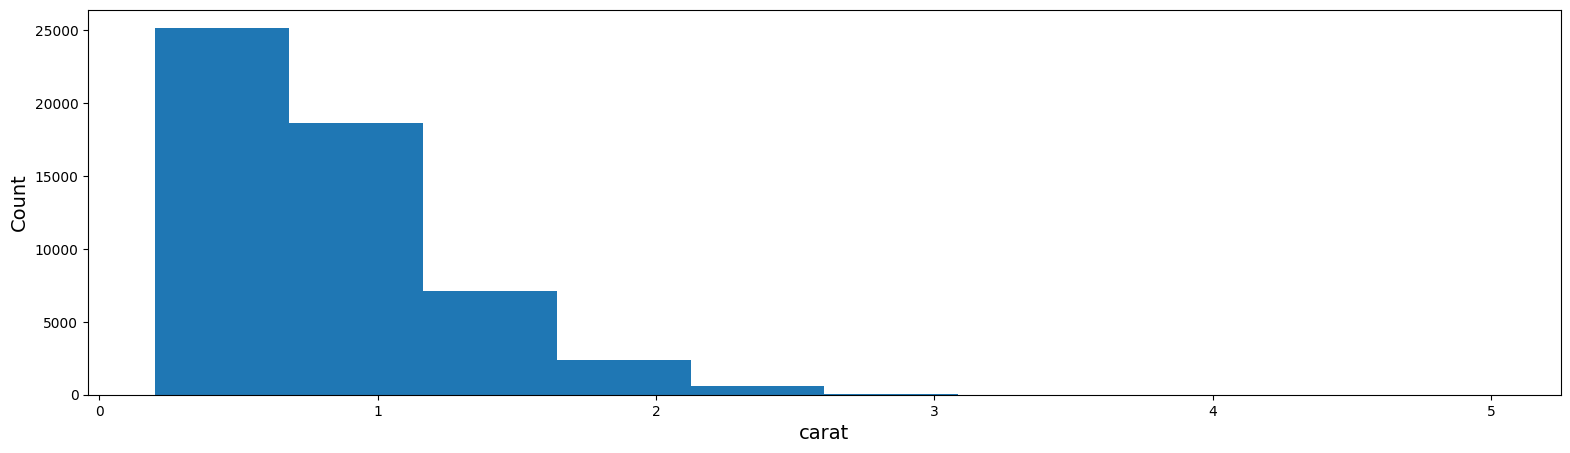

In [ ]:
plt.hist(diamonds['carat'])
plt.xlabel('carat', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
carat = diamonds['carat']
std_carat = preprocessing.scale(carat)


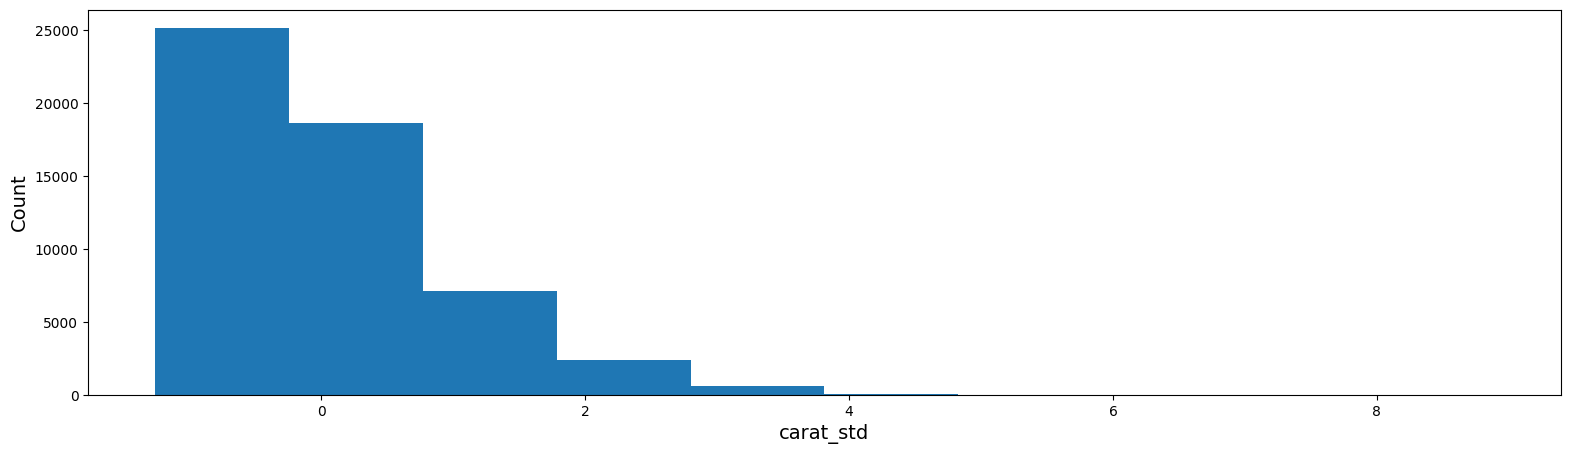

In [ ]:
plt.hist(std_carat)
plt.xlabel('carat_std', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Enriching Data

In [ ]:
diamonds.groupby(by=['clarity']).size()

,0
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


In [ ]:
# Combine clarity into fewer levels

# Create a new column clarity2 in the diamonds DataFrame by mapping
# the values of the existing clarity column to their corresponding descriptions.

diamonds['clarity2'] = diamonds.clarity.map(
    {
        'IF': 'Internally flawless',
        'VVS1': 'Very very slightly included',
        'VVS2': 'Very very slightly included',
        'VS1': 'Very slightly included',
        'VS2': 'Very slightly included',
        'SI1': 'Slightly included',
        'SI2': 'Slightly included',
        'I1': 'Included',
    }
)

print (diamonds)

diamonds.groupby(by=['clarity2']).size()

       carat        cut color clarity  depth  table  price  width  length  \
0       0.23      Ideal     E     SI2   61.5   55.0    326   3.95    3.98   
1       0.21    Premium     E     SI1   59.8   61.0    326   3.89    3.84   
2       0.23       Good     E     VS1   56.9   65.0    327   4.05    4.07   
3       0.29    Premium     I     VS2   62.4   58.0    334   4.20    4.23   
4       0.31       Good     J     SI2   63.3   58.0    335   4.34    4.35   
...      ...        ...   ...     ...    ...    ...    ...    ...     ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757   5.75    5.76   
53936   0.72       Good     D     SI1   63.1   55.0   2757   5.69    5.75   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757   5.66    5.68   
53938   0.86    Premium     H     SI2   61.0   58.0   2757   6.15    6.12   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757   5.83    5.87   

       height  std_price                clarity2  
0        2.43  -0.904095

,0
clarity2,
Included,741
Internally flawless,1790
Slightly included,22259
Very slightly included,20429
Very very slightly included,8721


In [ ]:
shape = diamonds['length'] / diamonds['width']
print(shape.head())
shape.describe()

# mean value is inf, std --> NaN , etc.

0    1.007595
1    0.987147
2    1.004938
3    1.007143
4    1.002304
dtype: float64


,0
count,5.393300e+04
mean,inf
std,NaN
min,6.189759e-01
25%,9.931034e-01
50%,1.004274e+00
75%,1.007429e+00
max,inf


In [ ]:
diamonds['length'].describe()

,length
count,53940.000000
mean,5.734526
std,1.142135
min,0.000000
25%,4.720000
50%,5.710000
75%,6.540000
max,58.900000


In [ ]:
diamonds['width'].describe()

,width
count,53940.000000
mean,5.731157
std,1.121761
min,0.000000
25%,4.710000
50%,5.700000
75%,6.540000
max,10.740000


In [ ]:
# Remove diamonds with length=0 and width=0, and recalculate

diamonds2 = diamonds[(diamonds['width'] > 0) & (diamonds['length'] > 0)]
shape = diamonds2['length'] / diamonds2['width']

diamonds2.insert(value=shape, loc=11, column='shape')
diamonds2['shape'].describe()

,shape
count,53932.000000
mean,1.000855
std,0.036366
min,0.618976
25%,0.993103
50%,1.004274
75%,1.007429
max,7.280593


In [ ]:
# Display the diamonds with a high shape value
diamonds2[diamonds2['shape'] > 1.1]

,carat,cut,color,clarity,depth,table,price,width,length,height,clarity2,shape
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,Slightly included,7.280593
34282,0.39,Premium,H,SI2,61.2,58.0,468,4.51,6.02,4.44,Slightly included,1.334812
48832,0.53,Ideal,F,VVS2,62.7,56.0,2030,5.16,6.20,3.25,Very very slightly included,1.201550
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,Very slightly included,6.174757


In [ ]:
diamonds2[(diamonds2['shape'] <1.25) & (diamonds2['shape'] > 1.05)]

,carat,cut,color,clarity,depth,table,price,width,length,height,std_price,shape
29423,0.42,Very Good,H,SI1,59.5,57.0,700,4.78,5.11,2.94,-0.810347,1.069038
42150,0.50,Ideal,F,SI1,59.9,56.0,1282,5.09,5.36,3.13,-0.664460,1.053045
48832,0.53,Ideal,F,VVS2,62.7,56.0,2030,5.16,6.20,3.25,-0.476964,1.201550
